# 🎯 AI-Based Student Study Tracking – Milestone 1: Data Preprocessing & EDA

This project is part of the Infosys Springboard Internship (Batch 5).  
The goal of this project is to analyze student performance data and identify patterns that influence academic success using data preprocessing and exploratory data analysis (EDA).


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 🧹 Data Preprocessing Steps

1. Mounted Google Drive and imported required libraries.
2. Loaded both student datasets using Pandas.
3. Merged them on common attributes like school, sex, age, etc.
4. Removed missing values and duplicates.
5. Encoded categorical variables using `pd.get_dummies()`.
6. Verified dataset structure and statistical summary.


In [3]:
math = pd.read_csv('/content/drive/MyDrive/AI_Project_Data/student-mat.csv')
por = pd.read_csv('/content/drive/MyDrive/AI_Project_Data/student-por.csv')

In [4]:
print(math.head())
print(por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

## 🧹 Data Preprocessing Steps

1. Mounted Google Drive and imported required libraries.
2. Loaded both student datasets using Pandas.
3. Merged them on common attributes like school, sex, age, etc.
4. Removed missing values and duplicates.
5. Encoded categorical variables using `pd.get_dummies()`.
6. Verified dataset structure and statistical summary.


In [5]:
merged_df = pd.merge(math, por, on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob'], how='inner')
print("Merged shape:", merged_df.shape)

Merged shape: (457, 56)


In [6]:
merged_df = merged_df.dropna()

In [7]:
merged_df = merged_df.drop_duplicates()

In [8]:
print(merged_df.dtypes)

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason_x        object
guardian_x      object
traveltime_x     int64
studytime_x      int64
failures_x       int64
schoolsup_x     object
famsup_x        object
paid_x          object
activities_x    object
nursery_x       object
higher_x        object
internet_x      object
romantic_x      object
famrel_x         int64
freetime_x       int64
goout_x          int64
Dalc_x           int64
Walc_x           int64
health_x         int64
absences_x       int64
G1_x             int64
G2_x             int64
G3_x             int64
reason_y        object
guardian_y      object
traveltime_y     int64
studytime_y      int64
failures_y       int64
schoolsup_y     object
famsup_y        object
paid_y          object
activities_y    object
nursery_y       object
higher_y   

In [9]:
encoded_df = pd.get_dummies(merged_df, drop_first=True)


In [10]:
print(encoded_df.describe())
print(encoded_df.corr())

              age        Medu        Fedu  traveltime_x  studytime_x  \
count  457.000000  457.000000  457.000000    457.000000   457.000000   
mean    16.562363    2.794311    2.540481      1.420131     2.041575   
std      1.157046    1.072652    1.089726      0.677545     0.835362   
min     15.000000    0.000000    0.000000      1.000000     1.000000   
25%     16.000000    2.000000    2.000000      1.000000     1.000000   
50%     16.000000    3.000000    3.000000      1.000000     2.000000   
75%     17.000000    4.000000    3.000000      2.000000     2.000000   
max     22.000000    4.000000    4.000000      4.000000     4.000000   

       failures_x    famrel_x  freetime_x     goout_x      Dalc_x  ...  \
count  457.000000  457.000000  457.000000  457.000000  457.000000  ...   
mean     0.275711    3.989059    3.238512    3.146608    1.481400  ...   
std      0.712145    0.899495    0.981185    1.144377    0.920159  ...   
min      0.000000    1.000000    1.000000    1.000000  

## 📈 Exploratory Data Analysis (EDA)

We performed visual and statistical analysis to identify trends:

- **Boxplot:** Detected outliers in final grades (`G3_x`).
- **Histogram:** Analyzed distribution of final grades.
- **Boxplot (Study Time vs Grade):** Found correlation between study time and grades.
- **Scatterplot (Absences vs Grade):** Observed that higher absences reduce grades.
- **Heatmap:** Checked correlation between numerical variables.


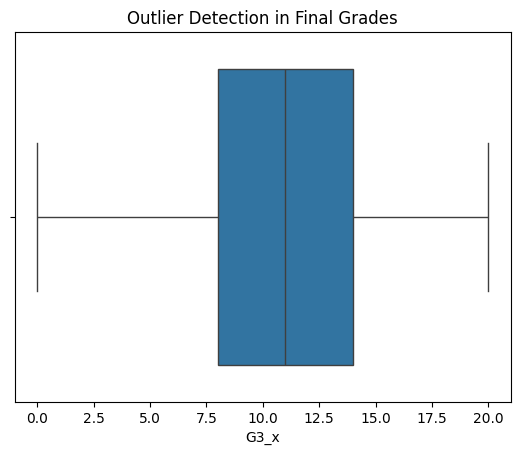

In [12]:
sns.boxplot(x=merged_df['G3_x'])
plt.title("Outlier Detection in Final Grades")
plt.show()


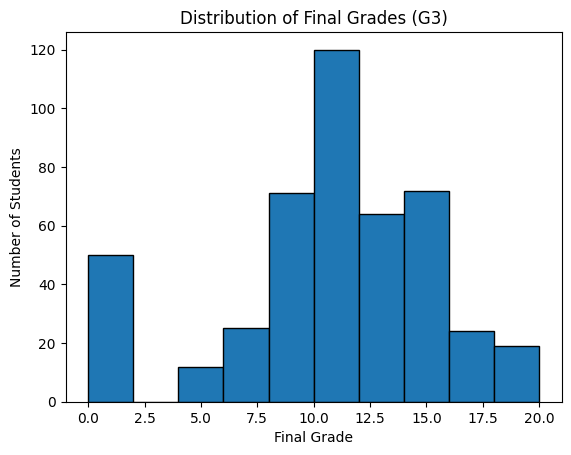

In [13]:
plt.hist(merged_df['G3_x'], bins=10, edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()


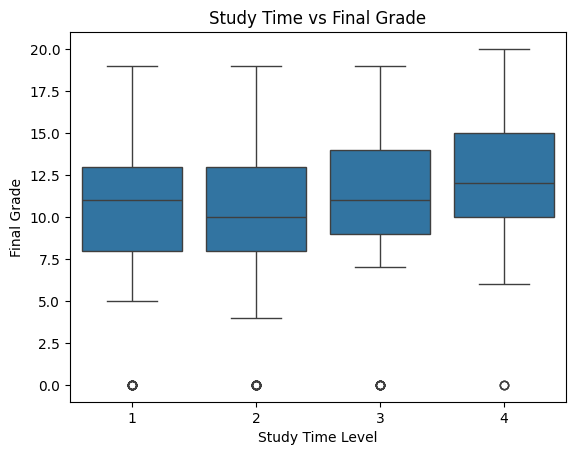

In [14]:
sns.boxplot(x='studytime_x', y='G3_x', data=merged_df)
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade")
plt.show()


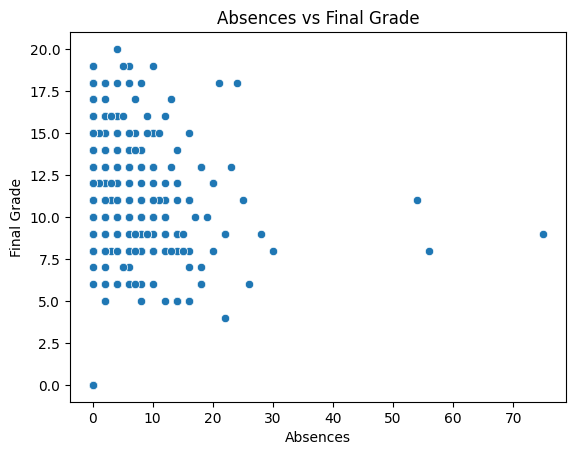

In [15]:
sns.scatterplot(x='absences_x', y='G3_x', data=merged_df)
plt.title("Absences vs Final Grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()


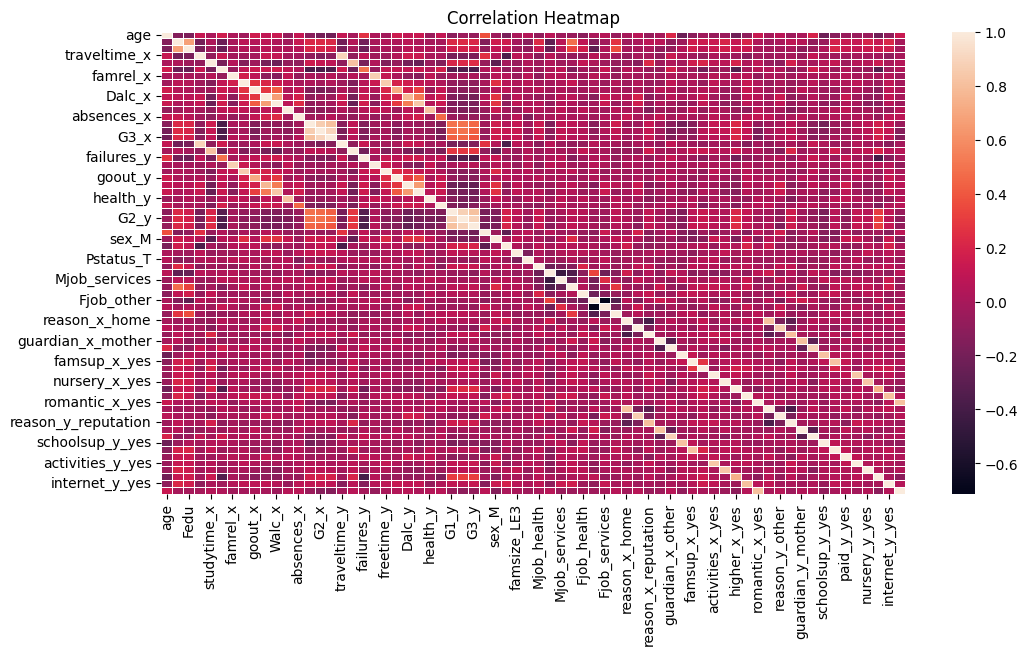

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(encoded_df.corr(), linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 💡 Key Insights

✅ Students with **higher study time** generally achieve **better grades**.  
✅ Students with **fewer absences** perform **better academically**.  
✅ Final grades show a **right-skewed distribution** — most students score in the mid-range.  
✅ Parental education and support show **moderate correlation** with academic performance.


## ✅ Conclusion

This milestone focused on cleaning, preparing, and understanding the dataset.  
The next stage will involve building machine learning models to predict or recommend study strategies for students.
